# Импорт

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Чтение файла

In [2]:
# Зарание удалил символы между интами
df = pd.read_excel('/home/uiif/GitRepos/Study/4course/ML/data.xlsx',
                  names = ['areas', 'bSchool', 'socialEd', 'addEd', 'smProfEd', 'highProfEd', 'county'])

In [3]:
display(df.head())

,areas,bSchool,socialEd,addEd,smProfEd,highProfEd,county
0,Белгородская область,7777.0,14918.0,2825.0,2009,1841.0,сenter
1,Брянская область,4560.0,10211.0,1538.0,1418,837.0,NaN
2,Владимирская область,5802.0,8902.0,1703.0,1468,NaN,сenter
3,Воронежская область,NaN,17186.0,3362.0,2458,4347.0,сenter
4,Ивановская область,4495.0,5649.0,1338.0,977,1288.0,сenter


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areas       85 non-null     object 
 1   bSchool     83 non-null     float64
 2   socialEd    84 non-null     float64
 3   addEd       84 non-null     float64
 4   smProfEd    84 non-null     object 
 5   highProfEd  83 non-null     float64
 6   county      84 non-null     object 
dtypes: float64(4), object(3)
memory usage: 4.8+ KB


In [5]:
# Колоночки фичей
cols = ['bSchool', 'socialEd', 'addEd', 'smProfEd', 'highProfEd']

In [6]:
# Ищу колонки которые не преобразовались

for col in cols:
    if(df[col].dtype == object):
        print(col)
        df[col] = pd.to_numeric(df[col], errors = 'coerce')

smProfEd


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85 entries, 0 to 84
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   areas       85 non-null     object 
 1   bSchool     83 non-null     float64
 2   socialEd    84 non-null     float64
 3   addEd       84 non-null     float64
 4   smProfEd    83 non-null     float64
 5   highProfEd  83 non-null     float64
 6   county      84 non-null     object 
dtypes: float64(5), object(2)
memory usage: 4.8+ KB


# Предобработка данных

Перва колонка бесполезно так что можно ей пренебречь, а так же строки без таргета можно отбросить

In [8]:
df = df[cols + ['county']]
df = df[~df['county'].isna()]

Кодировка лейблами

In [9]:
df['county_ind'], unque = pd.factorize(df['county'])

In [10]:
df['county_ind'].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [11]:
df[cols].describe()

,bSchool,socialEd,addEd,smProfEd,highProfEd
count,82.000000,83.000000,83.000000,82.000000,82.000000
mean,7366.902439,14842.891566,2531.253012,1816.182927,2186.158537
std,6517.939663,14807.863510,2105.782305,1528.899993,4252.161665
min,292.000000,614.000000,111.000000,36.000000,2.000000
25%,3343.250000,6751.500000,1205.000000,799.000000,622.750000
50%,5625.500000,9784.000000,1801.000000,1380.000000,1181.500000
75%,8549.000000,18843.500000,3228.000000,2380.250000,2416.750000
max,33195.000000,108858.000000,9967.000000,7924.000000,33757.000000


## Удаление выбросов

<AxesSubplot: >

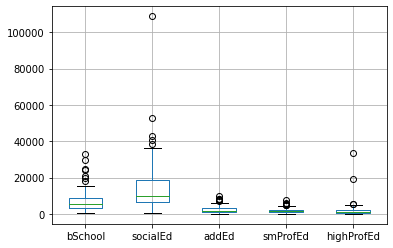

In [13]:
df.boxplot(cols)

In [14]:
for col in cols:
    q75,q25 = df[col].quantile(0.75), df[col].quantile(0.25)
    intr_qr = q75-q25
    maxp = q75+(1.5*intr_qr)
    minp = q25-(1.5*intr_qr)
    mask = (df[col] < maxp) & (df[col] > minp)
#     print(intr_qr)
    df[col][~mask] = None

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84 entries, 0 to 84
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   bSchool     75 non-null     float64
 1   socialEd    78 non-null     float64
 2   addEd       77 non-null     float64
 3   smProfEd    75 non-null     float64
 4   highProfEd  78 non-null     float64
 5   county      84 non-null     object 
 6   county_ind  84 non-null     int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 5.2+ KB


<AxesSubplot: >

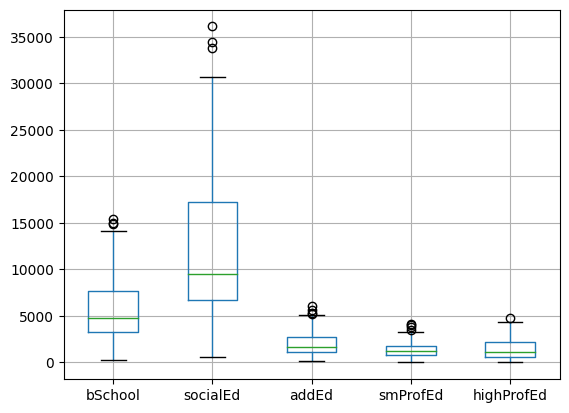

In [16]:
df.boxplot(cols)

## Заполнение нанов

In [17]:
df[cols] = df[cols].apply(lambda x: x.fillna(x.mean()))

Смотрим кореляции

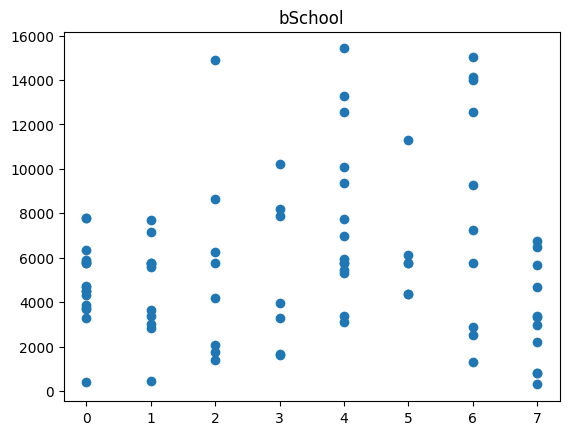

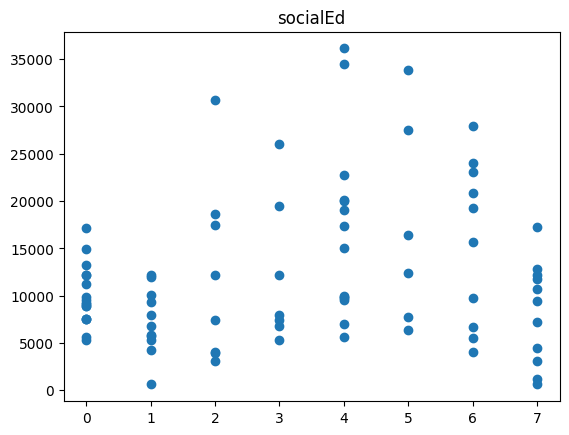

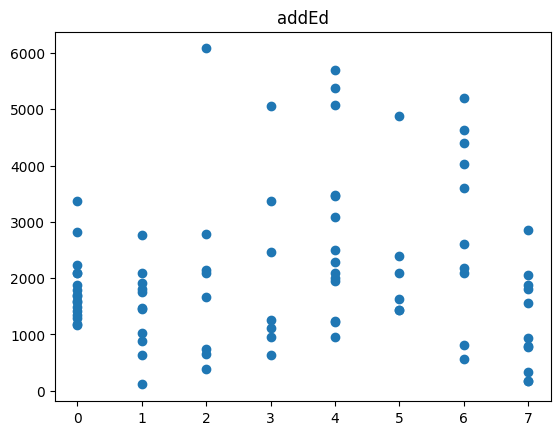

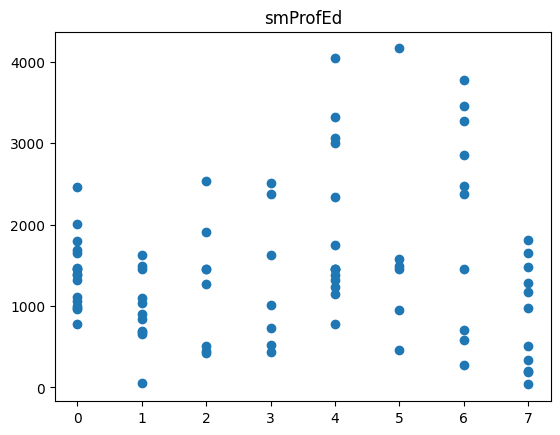

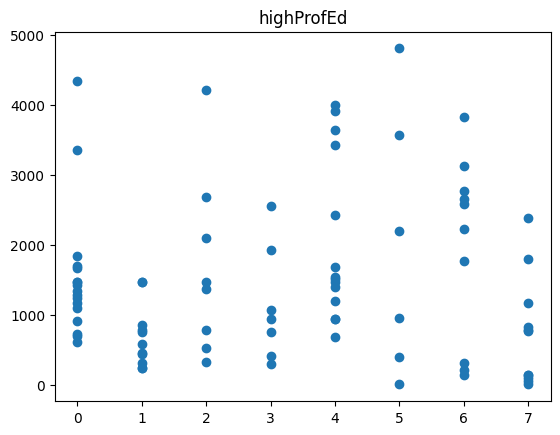

In [18]:
for col in cols:
    plt.scatter(df['county_ind'], df[col])
    plt.title(col)
    plt.show()

# Анализ

Не смог найти коэфиценты кореляции для заначемых и категореальных фичей